In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, header=None, names=columns, na_values='?')


print(data.head())


C:\Users\Admin\AppData\Local\Temp\ipykernel_16656\1995088552.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [4]:

X = data.drop(columns=['target'])
y = (data['target'] > 0).astype(int)  


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)


In [8]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [9]:

svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [10]:

def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluacija za {model_name}")
    print(f"Točnost: {accuracy_score(y_test, y_pred):.4f}")
    print("Matrica zabune:")
    print(confusion_matrix(y_test, y_pred))
    print("Izvještaj klasifikacije:")
    print(classification_report(y_test, y_pred))

print("\nLogistička regresija:")
evaluate_model(y_test, y_pred_log_reg, "Logistička regresija")

print("\nK-Nearest Neighbors:")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")

print("\nSupport Vector Machine:")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")



Logistička regresija:
Evaluacija za Logistička regresija
Točnost: 0.8667
Matrica zabune:
[[32  4]
 [ 4 20]]
Izvještaj klasifikacije:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60


K-Nearest Neighbors:
Evaluacija za K-Nearest Neighbors
Točnost: 0.8333
Matrica zabune:
[[32  4]
 [ 6 18]]
Izvještaj klasifikacije:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.82      0.75      0.78        24

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60


Support Vector Machine:
Evaluacija za Support Vector Machine
Točnost: 0.8833
Ma

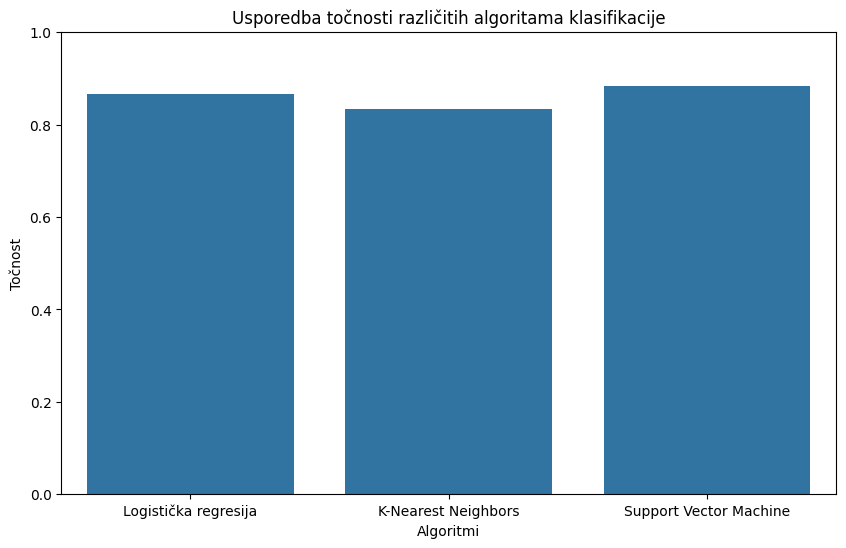

In [11]:

algorithms = ['Logistička regresija', 'K-Nearest Neighbors', 'Support Vector Machine']
accuracies = [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm)]

plt.figure(figsize=(10, 6))
sns.barplot(x=algorithms, y=accuracies)
plt.xlabel('Algoritmi')
plt.ylabel('Točnost')
plt.title('Usporedba točnosti različitih algoritama klasifikacije')
plt.ylim(0, 1)
plt.show()

In [12]:
print("\nPredikcije za nekoliko primjera iz testnog skupa:")
for i in range(10):
    print(f"Primjer {i+1}: Prave vrijednosti = {y_test.iloc[i]}, Predikcija Logističke regresije = {y_pred_log_reg[i]}, Predikcija KNN = {y_pred_knn[i]}, Predikcija SVM = {y_pred_svm[i]}")



Predikcije za nekoliko primjera iz testnog skupa:
Primjer 1: Prave vrijednosti = 0, Predikcija Logističke regresije = 0, Predikcija KNN = 0, Predikcija SVM = 0
Primjer 2: Prave vrijednosti = 1, Predikcija Logističke regresije = 0, Predikcija KNN = 0, Predikcija SVM = 0
Primjer 3: Prave vrijednosti = 0, Predikcija Logističke regresije = 0, Predikcija KNN = 0, Predikcija SVM = 0
Primjer 4: Prave vrijednosti = 1, Predikcija Logističke regresije = 1, Predikcija KNN = 1, Predikcija SVM = 1
Primjer 5: Prave vrijednosti = 0, Predikcija Logističke regresije = 0, Predikcija KNN = 0, Predikcija SVM = 0
Primjer 6: Prave vrijednosti = 0, Predikcija Logističke regresije = 0, Predikcija KNN = 0, Predikcija SVM = 0
Primjer 7: Prave vrijednosti = 0, Predikcija Logističke regresije = 0, Predikcija KNN = 0, Predikcija SVM = 0
Primjer 8: Prave vrijednosti = 0, Predikcija Logističke regresije = 1, Predikcija KNN = 1, Predikcija SVM = 1
Primjer 9: Prave vrijednosti = 1, Predikcija Logističke regresije = 1